# Support vector machines soft margin



In [25]:
import sys 

sys.path.append("/home/davi/PycharmProjects/Reconhecimento-de-Padroes")

from sklearn.model_selection import KFold
from Strings import string
from sklearn.model_selection import train_test_split
from numpy import zeros, identity, array, concatenate, \
    ones, ravel, dot, where, mean
from src.Utils.utils import get_accuracy, get_data
import matplotlib.pyplot as plt
from pandas import DataFrame
import cvxopt
import cvxopt.solvers


In [26]:
def get_p(number_lines, number_columns):
    tmp_aux = identity(number_columns)
    tmp_aux[:, number_columns-1] = 0
    
    print(tmp_aux.shape)
    P = cvxopt.matrix(tmp_aux, tc='d')
    return P

In [27]:
def get_q(number_columns):
    tmp1 = zeros((number_columns, 1))
    print(tmp1.shape)
    Q = cvxopt.matrix(tmp1, tc='d')
    
    return Q

In [28]:
def get_g(x, y, number_lines):
    if array(y, ndmin=2).shape[0] == 1: 
        tmp2 = array(y, ndmin=2).T * concatenate((x, ones((number_lines, 1))), axis=1)
    else:
        tmp2 = array(y, ndmin=2) * concatenate((x, ones((number_lines, 1))), axis=1)


    # print(tmp2.shape)
    # G = cvxopt.matrix(tmp2 * -1., tc='d')
    # return G
    
    # tmp2 = array(y, ndmin=2).T * concatenate((x, ones((number_lines, 1))), axis=1)
    print(tmp2.shape)
    G = cvxopt.matrix((tmp2 * -1.).T.tolist())

    return G

In [29]:
def get_h(number_lines):
    tmp2 = ones((number_lines, 1))
    
    print(tmp2.shape)
    H = cvxopt.matrix(tmp2 * -1., tc='d')

    return H

In [30]:
def quadratic_solver(x_train, y_train):
    
    number_lines, number_columns = x_train.shape 
    
    # bias
    number_columns += 1
    
    P = get_p(number_lines, number_columns)
    Q = get_q(number_columns)
    G = get_g(x_train, y_train, number_lines)
    H = get_h(number_lines)
    
    

    try:
        solution = cvxopt.solvers.qp(P, Q, G, H)
        best_weights = ravel(solution['x'])  
        return best_weights
    
    except ValueError as error:
        print(error)



In [31]:
def train(x_train, y_train):
    solution = quadratic_solver(x_train, y_train)
    return solution

In [32]:
def get_foward(weights, x_test):
    
    print(weights)
    print(x_test.shape)
    
    if x_test.shape[1] == array(weights[:weights.shape[0]-1], ndmin=2).shape[1]:
        H_output = dot(x_test, array(weights[:weights.shape[0]-1], ndmin=2).T)

    else:
        H_output = dot(x_test, array(weights[:weights.shape[0] - 1], ndmin=2))

    H_output += weights[weights.shape[0]-1]
    
    # H_output = dot(x_test, array(weights[:2], ndmin=2).T) + weights[2]
    # vec_sup = sum(H_output == 1.)
    return H_output


In [33]:
def predict(h, domain=None):
    if domain == [-1., 1.]:
        for i in range(len(h)):
            if h[i][0] > 0:
                h[i][0] = 1
            else:
                h[i][0] = -1

        return h
    

In [34]:
def test(weights, x_test, y_test):
    h_output = get_foward(weights, x_test)
    y_output = predict(h_output, domain=[-1., 1.])

    if y_output.shape == y_test.T.shape:
        accuracy = get_accuracy(y_output, array(y_test, ndmin=2).T)
    else:
        accuracy = get_accuracy(y_output, array(y_test, ndmin=2))
    
    return accuracy

In [35]:
data = get_data("column_2C_weka.arff", type="arff")
data = DataFrame(data)
number_lines = data.shape[0]
number_columns = data.shape[1]
X = array(data, ndmin=2)[:, :number_columns-1]
Y =   array(array(data, ndmin=2)[:, number_columns-1], ndmin=2).T
train_size = .8
test_size = .2

indices = where(Y == b'Abnormal')
Y[indices] = -1

indices = where(Y == b'Normal')
Y[indices] = 1

# print(X)
# print(Y)

[100]
(7, 7)
(7, 1)
(248, 7)
(248, 1)
     pcost       dcost       gap    pres   dres
 0:  6.5231e-04  5.2774e+02  2e+03  3e+00  5e+04
 1:  2.1899e-03  3.3864e+02  2e+03  2e+00  4e+04
 2:  1.9242e-03  9.2778e+02  2e+03  2e+00  3e+04
 3:  5.1841e-05  4.1061e+03  2e+03  1e+00  3e+04
 4:  7.9914e-06  1.3229e+04  2e+03  1e+00  2e+04
 5:  5.0351e-07  6.7974e+04  5e+03  1e+00  2e+04
 6:  2.7515e-07  3.7044e+05  2e+04  1e+00  2e+04
 7:  1.9991e-06  4.3899e+06  1e+05  1e+00  2e+04
 8:  2.4503e-03  1.6186e+08  6e+05  1e+00  2e+04
 9:  2.3365e-02  4.1926e+10  6e+06  1e+00  2e+04
10:  5.7814e-02  2.9004e+14  5e+08  1e+00  9e+05
Terminated (singular KKT matrix).
[-1.96322791e-01  1.96322817e-01 -4.52371950e-09  1.96322799e-01
 -2.14272961e-08  2.88255962e-09  1.95463777e-06]
(62, 6)

            Realização: 0 

            Epocas: None 

            Acuracia: 0.3064516129032258 

            Matriz de confusão: None

    
          
(7, 7)
(7, 1)
(248, 7)
(248, 1)
     pcost       dcost       gap 

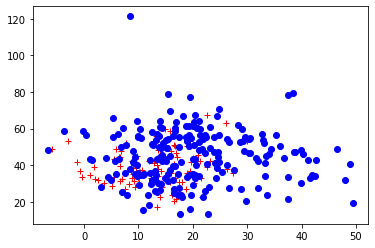

In [36]:
acc = []
pos = X[where(Y == 1)[0]]
neg = X[where(Y == -1)[0]]

print(sum(Y==1))
plt.plot(pos[:, 1], pos[:, 3], 'r+')
plt.plot(neg[:, 1], neg[:, 3], 'bo')
plt.show()


for realization in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    
    weights = train(x_train, y_train)
    # print(weights)
    if weights is None:
        print("ERROR")
        continue
    accuracy = test(weights, x_test, y_test)
    acc.append(accuracy)
    
    print(string.RUN.format(realization, None, accuracy, None))  
    
print(mean(acc))